In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [2]:
sns.set_style('darkgrid')

In [3]:
import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# Assuming your CSV files are in a folder named 'csv_data' within the current directory
folder_path = os.path.join(current_directory, 'Data')

dataframes = {}

# Loop through the files in the directory and read only .csv files
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        dataframe_name = os.path.splitext(filename)[0]  # Remove the .csv extension
        dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
        dataframes[dataframe_name] = dataframe

# Now, dataframes will contain all your .csv files as DataFrames with their respective names.
dataframes.keys()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_29052\479943422.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_29052\479943422.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_29052\479943422.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_29052\479943422.py:16: FutureWarning: The error_bad_lines argument has been depr

dict_keys(['dailyActivity_merged', 'dailyCalories_merged', 'dailyIntensities_merged', 'dailySteps_merged', 'heartrate_seconds_merged', 'hourlyCalories_merged', 'hourlyIntensities_merged', 'hourlySteps_merged', 'minuteCaloriesNarrow_merged', 'minuteCaloriesWide_merged', 'minuteIntensitiesNarrow_merged', 'minuteIntensitiesWide_merged', 'minuteMETsNarrow_merged', 'minuteSleep_merged', 'minuteStepsNarrow_merged', 'minuteStepsWide_merged', 'sleepDay_merged', 'weightLogInfo_merged'])

In [4]:
#Importing dataset (Sleep Data)
df=pd.read_csv('Sleep Data.csv')
df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04-12-2016,1,327,346
1,1927972279,04-12-2016,3,750,775
2,2026352035,04-12-2016,1,503,546
3,3977333714,04-12-2016,1,274,469
4,4020332650,04-12-2016,1,501,541


To gain deeper insights into the sleep patterns of Fitbit users, we will categorize them into four groups which defines optimal sleep duration as follows:

**- Excess: More than 9 hours** \
**- Good: Between 7 and 9 hours** \
**- Deprived: Less than 7 hours**

In [5]:
df['hours'] = df['TotalMinutesAsleep'] / 60

In [6]:
'''
This code categorizes Fitbit users' sleep durations into three groups based on
recommended sleep durations: 'Deprived' for less than 7 hours, 'Good' for 7-9
hours, and 'Excess' for more than 9 hours.
'''
#Creating bins
bins = [df.hours.min(), 7, 9, df.hours.max()]
labels = ['Deprived', 'Good', 'Excess']

df['SleepBins'] = pd.cut(
    df['hours'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False,
)

# Distribution of Sleep Duration Categories

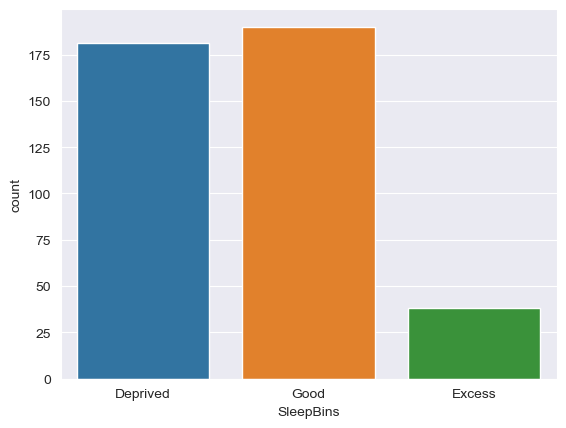

In [7]:
#Plotting countplot
sns.countplot(data=df, x='SleepBins');

We observe that the number of people getting the recommended amount of sleep is roughly equal to the number of sleep-deprived individuals, while those with excessive sleep appear to be less common. This balance between the 'Good' and 'Deprived' sleep groups seems unexpected, prompting us to investigate whether there are any outliers in the data.

# Distribution of Sleep Duration

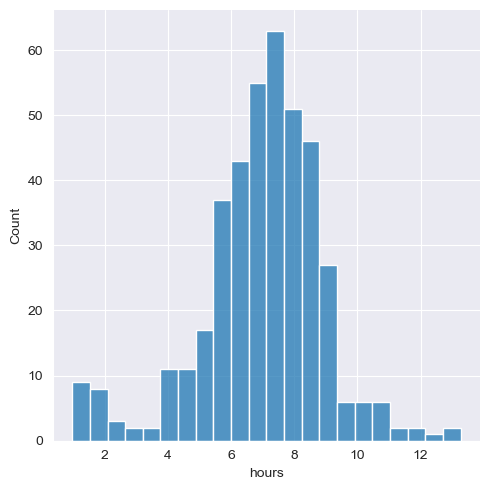

In [8]:
#Plotting distplot
sns.displot(data=df, x='hours');

- There is an unusual peak in the records where individuals reported having 3 or fewer hours of sleep.
- To ensure a more representative analysis, we will exclude records with less than 3 hours of sleep, focusing on what can be considered "normal" values.

# Distribution of Sleep Duration Categories for Sleep Duration Greater Than 3 Hours

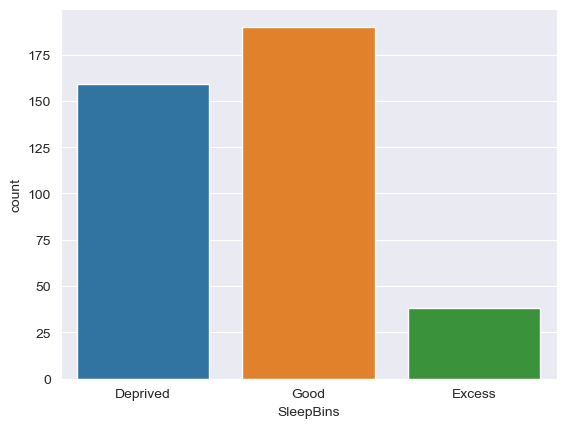

In [9]:
#Plotting countplot based upon specifed condition
df = df[df['hours'] > 3].copy()
sns.countplot(data=df, x='SleepBins');

- To identify individuals with the best sleep habits, we'll assess how many nights they had with enough sleep compared to the total number of recorded nights.
- This involves grouping and pivoting the data to extract the necessary information.

In [10]:
'''
This code is creating a pivot table to analyze sleep patterns. It first groups the
data by user ID and the sleep category (deprived, good, excess). Then, it calculates
the count of each sleep category for each user. The pivot table is used to arrange
this data with users as rows and sleep categories as columns. The code also computes
a "goodRatio" for each user, representing the proportion of nights with good sleep
compared to all sleep categories. Finally, it creates a new column, "goodSleeper,"
which identifies users as "good sleepers" if their "goodRatio" is equal to or greater 
than 0.6.
'''
#Creating groups 
sleepPivot = df.groupby(['Id', 'SleepBins']).agg(
    sleepCount=('SleepBins', 'count')).reset_index().pivot(index='Id',
                                                           columns='SleepBins',
                                                           values='sleepCount')
sleepPivot['goodRatio'] = sleepPivot['Good'] / sleepPivot[[
    'Deprived', 'Good', 'Excess'
]].sum(axis=1)

sleepEnhanced = df.merge(sleepPivot, on='Id')
sleepEnhanced['goodSleeper'] = sleepEnhanced['goodRatio'] >= 0.6

In [11]:
#Calculating valuecounts
sleepEnhanced.drop_duplicates(subset=['Id']).goodSleeper.value_counts()

False    16
True      5
Name: goodSleeper, dtype: int64

Our initial analysis is now complete, and we've achieved the following:

 - Grouped users based on their recorded sleep durations.
 - Identified and removed outliers with exceptionally low sleep durations.
 - Obtained a list of user IDs with the most consistent adequate sleep patterns.
 
These steps lay the foundation for more in-depth analysis of the available data.

In [12]:
#Creating new column 'Date' for both of the datasets
sleepEnhanced['Date'] = pd.to_datetime(sleepEnhanced['SleepDay']).dt.date
dailyActivity = dataframes['dailyActivity_merged']
dailyActivity['Date'] = pd.to_datetime(dailyActivity['ActivityDate']).dt.date
dailyActivity['ActiveMinutes'] = dailyActivity[[
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'
]].sum(axis=1)

In [13]:
#Merging both dataet on specified columns
sleepEnhanced = sleepEnhanced.merge(
    dataframes['dailyActivity_merged'],
    on=['Id', 'Date'],
)
sleepEnhanced = sleepEnhanced[[
    'Id', 'Date', 'TotalMinutesAsleep', 'TotalTimeInBed', 'hours', 'SleepBins',
    'goodSleeper', 'TotalSteps', 'TotalDistance', 'ActiveMinutes',
    'SedentaryMinutes', 'Calories'
]]

# Relationship Between Sleep Duration, Sedentary Minutes, and Sleep Categories

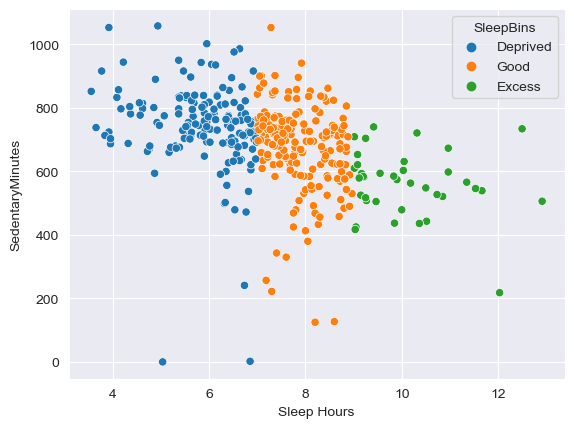

In [14]:
#Plotting scatterplot
sns.scatterplot(data=sleepEnhanced,
                x='hours',
                y='SedentaryMinutes',
                hue='SleepBins')
plt.xlabel("Sleep Hours");

It seems there's a correlation between the amount of sedentary time and hours slept. **Specifically, individuals who are highly sedentary tend to sleep less, while those who sleep more than 9 hours are generally less sedentary.** To delve deeper into these insights, we'll enrich our current dataset with heart rate data from the "Heartrate Data" dataset.

In [15]:
#Converting datatype
heartData = dataframes['heartrate_seconds_merged']
heartData['Datetime'] = pd.to_datetime(heartData['Time'],
                                       format="%m/%d/%Y %I:%M:%S %p")
heartData = heartData[heartData.Id.isin(sleepEnhanced.Id)].copy()
heartData['Hour'] = heartData['Datetime'].dt.hour + (
    heartData['Datetime'].dt.minute / 60)
heartData['Date'] = heartData['Datetime'].dt.date

In [16]:
'''
This code categorizes hours of the day into time periods (like 'night' and 'morning')
based on their values. It creates labels for these periods and assigns them to each
hour, allowing for further analysis of data based on time of day.
'''
#Creating bins
bins = [0, 5, 12, 17, 21, 24]
labels = ['night', 'morning', 'day', 'afternoon', 'evening']

heartData['TimeBins'] = pd.cut(
    heartData['Hour'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True,
)

In [17]:
#Grouping
heartData['binMedian'] = heartData.groupby(['Id', 'Date', 'TimeBins'
                                            ])['Value'].transform('median')
heartData = heartData[['Id', 'Date', 'TimeBins',
                       'binMedian']].drop_duplicates()
sleepEnhanced = sleepEnhanced.merge(heartData, on=['Id', 'Date'])

When grouping hear rates, we took the median value for the hour, as sudden bursts of activity, like using the stairs or inacurracies of the sensor might affect our value
reprhase it

# Comparison of Median Heart Rate During Different Times of the Day Between Good Sleepers and Others

C:\Users\Mukul\AppData\Local\Temp\ipykernel_29052\1623101513.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sleepEnhanced,


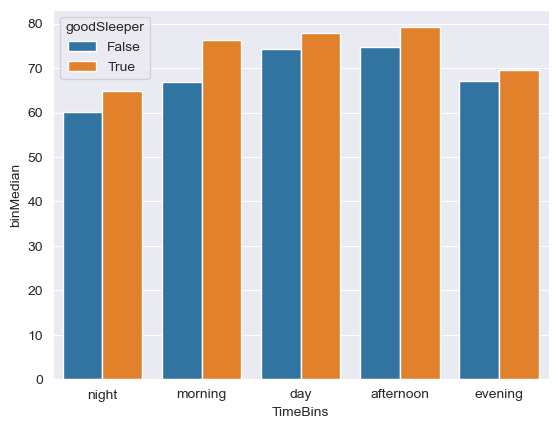

In [18]:
#Plotting barplot
sns.barplot(data=sleepEnhanced,
            x='TimeBins',
            y='binMedian',
            hue='goodSleeper',
            ci=None);

It's noticeable that **good sleepers tend to have higher median heart rates across all time sections of the day.**

# Comparison of Key Fitness Metrics (Calories, Total Steps, Active Minutes) Between Good Sleepers and Others

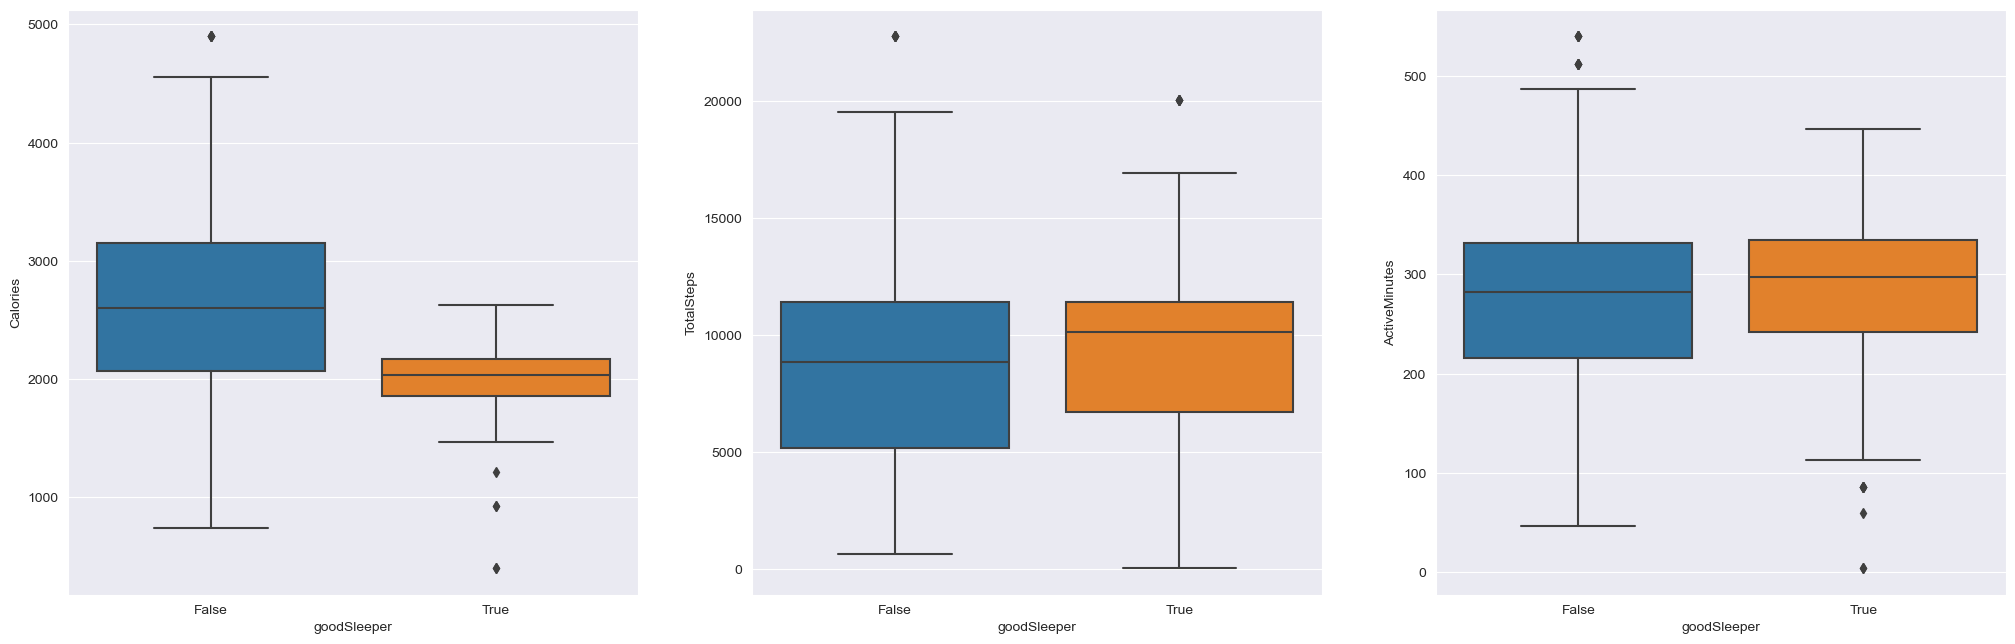

In [19]:
#Plotting boxplot on 'Calories', 'TotalSteps' and 'ActiveMinutes' as paramters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 7.6))
sns.boxplot(data=sleepEnhanced, x='goodSleeper', y='Calories', ax=ax1)

sns.boxplot(data=sleepEnhanced, x='goodSleeper', y='TotalSteps', ax=ax2)

sns.boxplot(data=sleepEnhanced, x='goodSleeper', y='ActiveMinutes', ax=ax3);

The three graphs provide intriguing insights into the data:

1. On average, individuals who sleep well tend to burn fewer calories than those with poor sleep patterns. 
2. **Good sleepers generally walk a bit more, and their activity levels have a narrower range.**
3. Good sleepers exhibit higher average activity levels, and their activity ranges are also more tightly distributed.
Interestingly, both good and bad sleepers have outliers in contrasting directions, but good sleepers tend to have a more constrained range of activity levels.

These findings suggest that the quality of sleep may be more closely related to the intensity of activity rather than the total calorie expenditure.

Upon scrutinizing the user data, it becomes evident that **individuals with suboptimal sleep patterns should engage in lower-intensity activities that enable prolonged physical activity.** Furthermore, these activities should be performed at an intensity level that allows for sustained effort without significant calorie expenditure, ultimately leading to a reduction in overall calorie burn.